In [15]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [16]:
def synthetic_data(w, b, num_examples):  #@save
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [17]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([ 0.9143, -0.5565]) 
label: tensor([7.9215])


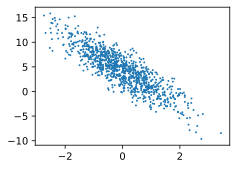

In [18]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1);

In [19]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [26]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 1.2295,  2.0801],
        [ 0.1781, -0.4396],
        [-0.5093, -1.1974],
        [-0.7457, -1.3392],
        [-0.1230, -0.3572],
        [ 0.9612,  0.3557],
        [-0.5034,  0.2233],
        [-0.7434, -0.8209],
        [-1.8809,  0.7391],
        [-0.3229,  0.8918]]) 
 tensor([[-0.4057],
        [ 6.0627],
        [ 7.2439],
        [ 7.2600],
        [ 5.1641],
        [ 4.9233],
        [ 2.4493],
        [ 5.4824],
        [-2.0832],
        [ 0.5150]])


In [27]:
for X, y in data_iter(10, features, labels):
    print(X.shape, y.shape)
    break



torch.Size([10, 2]) torch.Size([10, 1])


In [28]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [29]:
def linreg(X, w, b):  #@save
    return torch.matmul(X, w) + b

In [30]:
def squared_loss(y_hat, y):  #@save
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [31]:
def sgd(params, lr, batch_size):  #@save
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [39]:
lr = 0.000001
num_epochs = 4
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  
        l.sum().backward()
        sgd([w, b], lr, batch_size) 
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.000049
epoch 2, loss 0.000049
epoch 3, loss 0.000049
epoch 4, loss 0.000049


In [41]:
print(f'w error: {true_w - w.reshape(true_w.shape)}')
print(f'b error: {true_b - b}')

w error: tensor([-0.0003, -0.0001], grad_fn=<SubBackward0>)
b error: tensor([9.4891e-05], grad_fn=<RsubBackward1>)
